## Множественная Регрессия


In [98]:
#Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.stattools
from statsmodels.compat import lzip
import seaborn as sns
from sklearn import linear_model as lm
from sklearn import model_selection
from sklearn import cross_validation
from sklearn.preprocessing import scale, PolynomialFeatures 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from patsy import dmatrix
import nbconvert

In [2]:
#Введем данные в массив
url='http://archive.ics.uci.edu/ml/datasets/Energy+efficiency'
ENB = pd.read_excel('ENB2012_data.xlsx')
ENB.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


The dataset contains eight attributes (or features, denoted by X1...X8) and outcome y1 . The aim is to use the eight features to predict responses. 

Specifically: 
1. X1	Relative Compactness 
2. X2	Surface Area 
3. X3	Wall Area 
4. X4	Roof Area 
5. X5	Overall Height 
6. X6	Orientation 
7. X7	Glazing Area 
8. X8	Glazing Area Distribution 
9. y1	Cooling Load

In [3]:
#Проанализируем данные
print(ENB.dtypes)
print(ENB.shape)

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
dtype: object
(768, 9)


In [4]:
# проверка на пустые значения
ENB.isnull().sum().sort_values(ascending=False)

Y1    0
X8    0
X7    0
X6    0
X5    0
X4    0
X3    0
X2    0
X1    0
dtype: int64

In [5]:
# Проверка на численные значения
numeric= ENB.select_dtypes(include=[np.number])
numeric

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,21.97


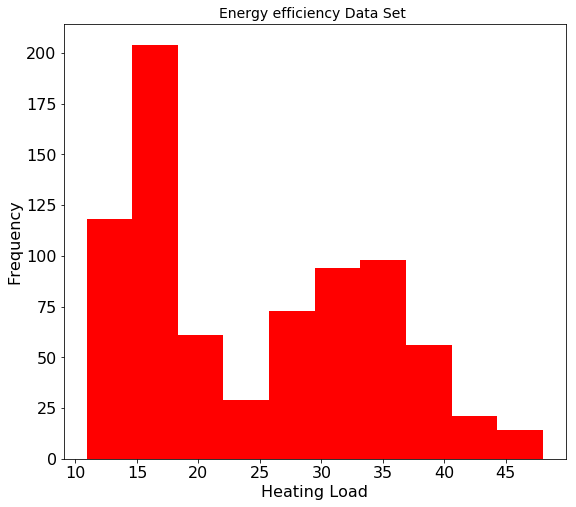

In [6]:
# Histogram of target variable
plt.figure(figsize=(9,8))
plt.hist(ENB["Y1"],color="red")
plt.title("Energy efficiency Data Set ", size=14)
plt.ylabel("Frequency", size=16)
plt.xlabel("Heating Load", size=16)
plt.tick_params(labelsize=16)
plt.show()

In [25]:
# Разделим на Х и У
features = ENB.columns[:-1]
X = ENB.iloc[:, :-1]
y = ENB.Y1
print(y)

0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
5      25.38
6      25.16
7      29.60
8      27.30
9      21.97
10     23.49
11     27.87
12     23.77
13     21.46
14     21.16
15     24.93
16     37.73
17     31.27
18     30.93
19     39.44
20     29.79
21     29.68
22     29.79
23     29.40
24     10.90
25     11.19
26     10.94
27     11.17
28     11.27
29     11.72
       ...  
738    47.01
739    44.87
740    39.37
741    39.80
742    37.79
743    38.18
744    16.69
745    16.62
746    16.94
747    16.70
748    15.59
749    14.58
750    15.33
751    15.31
752    16.63
753    15.87
754    16.54
755    16.74
756    17.64
757    17.79
758    17.55
759    18.06
760    20.82
761    20.21
762    20.71
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: Y1, Length: 768, dtype: float64


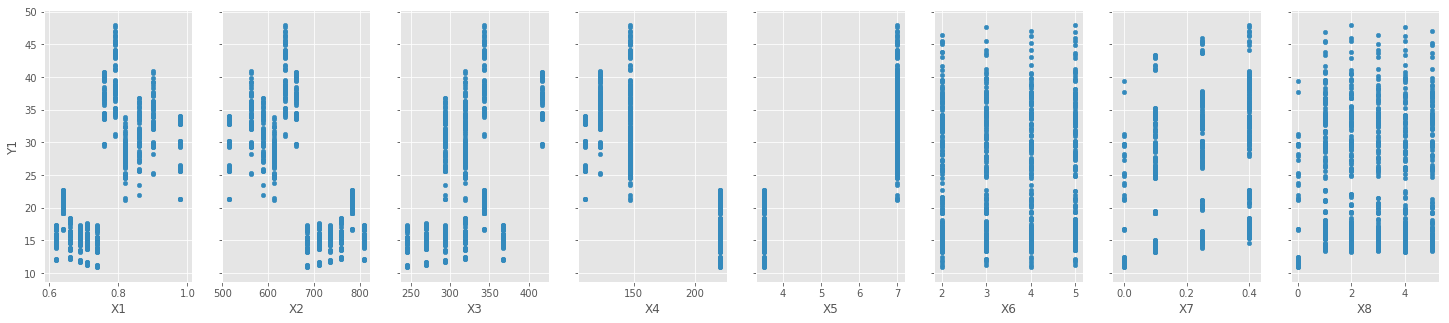

In [72]:
#Построим графики зависимости каждого параметра от y
feature_cols = ['X1', 'X2', 'X3','X4','X5','X6','X7','X8']
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    ENB.plot(kind='scatter', x=feature, y='Y1', ax=axs[index], figsize=(25,5))

Для вводных значений создадим матрицу Xс, добавив туда колонку с константой.
Используя пакет statsmodels, построим модель линейной регрессии для Y2 и выведем результаты:

In [26]:
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y, Xc)
fitted_model = linear_regression.fit()
fitted_model.summary(alpha=0.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     859.1
Date:                Fri, 11 Jan 2019   Prob (F-statistic):               0.00
Time:                        01:28:55   Log-Likelihood:                -1979.3
No. Observations:                 768   AIC:                             3975.
Df Residuals:                     760   BIC:                             4012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const         97.2457     20.765      4.683      0.000      63.049     131.442
X1           -70.7877     11.225     -6.306      0.000     -89.274     -52.301
X2            -0.0661      0.015     -4.519      0.000      -0.090      -0.042
X3             0.0225      0.004      5.365      0.000       0.016       0.029
X4            -0.0443      0.008     -5.404      0.000      -0.058      -0.031
X5             4.2838      0.369     11.618      0.000       3.677       4.891
X6             0.1215      0.103      1.176      0.240      -0.049       0.292
X7            14.7171      0.888     16.573      0.000      13.255      16.180
X8             0.0407      0.076      0.534      0.594      -0.085       0.166
==============================================================================
Omnibus:                      104.668   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.547
Skew:                           0.767   Prob(JB):                     8.65e-51
Kurtosis:                       5.203   Cond. No.                     3.35e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.04e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
#Построим матрицу корреляции чтобы определить характер зависимости между предикторами
correlation_matrix = X.corr()
print(correlation_matrix)

              X1            X2            X3            X4            X5   X6  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01  0.0   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01  0.0   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01  0.0   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01  0.0   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00  0.0   
X6  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.0   
X7  1.283986e-17  1.318356e-16 -7.969726e-19 -1.381805e-16  1.861418e-18  0.0   
X8  1.764620e-17 -3.558613e-16  0.000000e+00 -1.079129e-16  0.000000e+00  0.0   

              X7            X8  
X1  1.283986e-17  1.764620e-17  
X2  1.318356e-16 -3.558613e-16  
X3 -7.969726e-19  0.000000e+00  
X4 -1.381805e-16 -1.079129e-16  
X5  1.861418e-18  0.000000e+00  
X6  0.000000e+00  0.000000e+00  
X7  1.000000e+00  2.129642e-01  
X8  2.

C:\Users\yurid\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\yurid\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\yurid\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\yurid\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as 

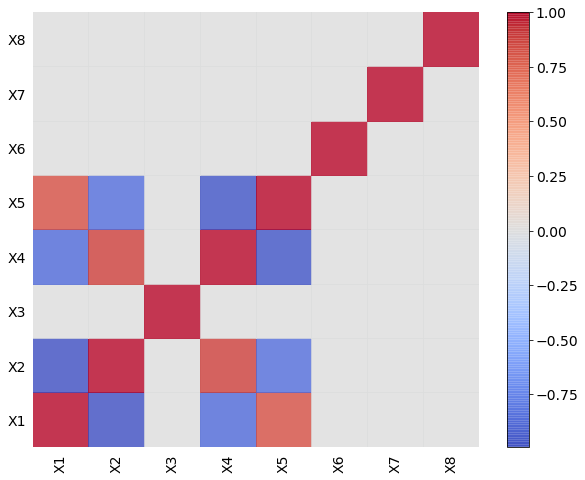

In [12]:
#Построим тепловую карту
def visualize_correlation_matrix(data, hurdle=0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(features, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(features, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off')
    plt.colorbar()
    plt.show()
visualize_correlation_matrix(X, hurdle=0.5)

Из тепловой карты видно, что между переменными X1,X2,X4 и X5 существует тесная свзять, в то время как переменные X3, X6, X7, x8  не связаны. Возможно наличие мультиколлинеарности. Зададим фунцию, чтобы это проверить.

In [13]:
#Напишем функцию для определения VIF (фактора инфляции дисперсии) для расчета мультиколинеарности
def vif_cal(input_data, dependent_col):
    import statsmodels.formula.api as smf
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(xvar_names[i]," VIF= ",vif)

In [14]:
vif_cal(input_data=ENB, dependent_col="Y1")

X1  VIF=  105.52
X2  VIF=  inf
X3  VIF=  inf
X4  VIF=  inf
X5  VIF=  31.21
X6  VIF=  1.0
X7  VIF=  1.05
X8  VIF=  1.05


C:\Users\yurid\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Если VIF>10, то принято считать, что мультиколлинеарность присутствует. Попробуем от нее избавиться, удаляя по одному столбцы с наибольшим VIF

In [15]:
ENB1=ENB.drop('X2',axis=1)
X1 = ENB1.iloc[:, :-1]
Xc1 = sm.add_constant(X1)
fitted_model1 = sm.OLS(y, Xc1).fit()
print(fitted_model1.summary(alpha=0.1))
print(vif_cal(input_data=ENB1, dependent_col="Y1"))

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     859.1
Date:                Fri, 11 Jan 2019   Prob (F-statistic):               0.00
Time:                        01:26:52   Log-Likelihood:                -1979.3
No. Observations:                 768   AIC:                             3975.
Df Residuals:                     760   BIC:                             4012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const         97.2457     20.765      4.683      0.0

In [16]:
ENB2=ENB1.drop('X8',axis=1)
X2 = ENB2.iloc[:, :-1]
Xc2 = sm.add_constant(X2)
fitted_model2 = sm.OLS(y, Xc2).fit()
print(fitted_model2.summary(alpha=0.1))
print(vif_cal(input_data=ENB2, dependent_col="Y1"))

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1003.
Date:                Fri, 11 Jan 2019   Prob (F-statistic):               0.00
Time:                        01:27:20   Log-Likelihood:                -1979.5
No. Observations:                 768   AIC:                             3973.
Df Residuals:                     761   BIC:                             4005.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const         97.3366     20.754      4.690      0.0

In [17]:
ENB3=ENB2.drop('X4',axis=1)
X3 = ENB3.iloc[:, :-1]
Xc3 = sm.add_constant(X3)
fitted_model3 = sm.OLS(y, Xc3).fit()
print(fitted_model3.summary(alpha=0.1))
print(vif_cal(input_data=ENB3, dependent_col="Y1"))

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1166.
Date:                Fri, 11 Jan 2019   Prob (F-statistic):               0.00
Time:                        01:27:22   Log-Likelihood:                -1990.6
No. Observations:                 768   AIC:                             3993.
Df Residuals:                     762   BIC:                             4021.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const         -0.0577      2.943     -0.020      0.9

Как мы видим, значения VIF стали меньше 10. Проведем анализ на наличие гетероскедастичности,  используя тест Бройша-Пагана и тест Уайта

In [18]:
#тест Бройша-Пагана
name = ['Lagrange multiplier statistic', 'lm_pvalue',
        'f-value', 'f_pvalue']
test = sms.het_breuschpagan(fitted_model3.resid, fitted_model3.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 195.68330833713514),
 ('lm_pvalue', 2.380673931256759e-40),
 ('f-value', 52.10775192303276),
 ('f_pvalue', 1.5885463363794257e-46)]

In [19]:
#тест Уайта
name = ['F statistic', 'p-value']
test = sms.het_white(fitted_model3.resid, fitted_model3.model.exog)
lzip(name, test)

[('F statistic', 329.4857891223992), ('p-value', 1.7465099572983844e-58)]

## Гребневая-регрессия

In [20]:
#создадим аргумент альфа с большим диапазоном от очень маленьких до очень больших
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

С каждым альфа-значением связан вектор коэффициентов ридж регрессии, которые будут хранииться в матрице coefs.  Для стандартизации включен параметр 𝚗𝚘𝚛𝚖𝚊𝚕𝚒𝚣𝚎 = 𝚃𝚛𝚞𝚎:

In [27]:
ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 8)

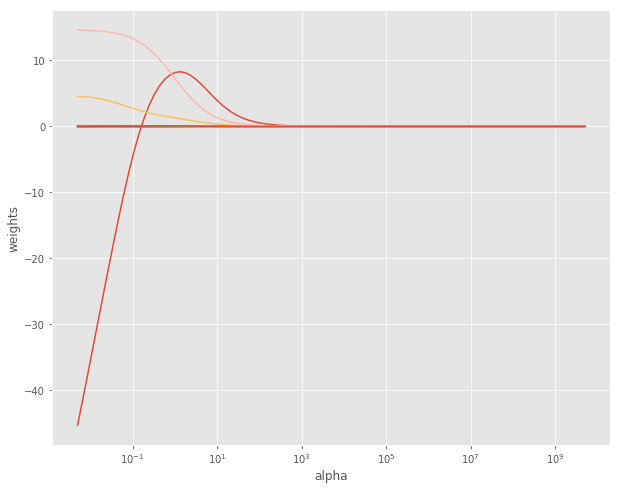

In [28]:
#строим график

plt.style.use('ggplot')
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.rcParams['figure.figsize'] = (10,9)

In [29]:
# разобьем выбору на тестовую и тренировочную
X_train, X_test , y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=1)

In [30]:
#Построим ридж-регрессию и вычислим MSE при альфа=4
ridge1 = Ridge(alpha=4, normalize=True)
ridge1.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred1 = ridge1.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge1.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred1))        # Calculate the test MSE

X1    6.692737
X2   -0.008779
X3    0.016868
X4   -0.024707
X5    0.687921
X6   -0.004103
X7    3.165555
X8    0.071014
dtype: float64
41.000046335632916


In [31]:
#Подберем коэффициент альфа
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

C:\Users\yurid\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\yurid\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\yurid\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\yurid\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\yurid\Anaconda3\lib\sit

0.005

In [32]:
#Рассчитаем MSE при альфа=0.005
ridge2 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge2.fit(X_train, y_train)
print(pd.Series(ridge2.coef_, index=X.columns))
print(mean_squared_error(y_test, ridge2.predict(X_test)))

X1   -45.748800
X2    -0.026412
X3     0.010947
X4    -0.054739
X5     4.541508
X6     0.187011
X7    14.883663
X8     0.046579
dtype: float64
11.053326050207708


## Лассо регрессия


Text(0,0.5,'weights')

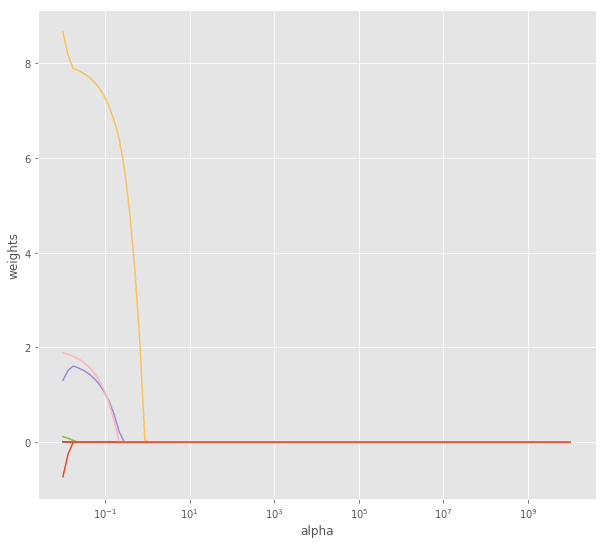

In [33]:
#Строим лассо регрессию с коэффициентом 10000
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [34]:
#выполним 10-кратную перекрестную проверку, чтобы выбрать наилучшую альфа и вычислить соответствующую MSE:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

11.00210329666418

In [35]:
#Теперь некоторые коэффициенты стали=0
pd.Series(lasso.coef_, index=X.columns)

X1   -55.166215
X2    -0.026688
X3    -0.000000
X4    -0.071590
X5     4.673178
X6     0.180553
X7    14.928242
X8     0.033852
dtype: float64

## Регрессия на главные компоненты

In [37]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [39]:
#выведем первые переменные первых компонентов
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.495951,-0.244735,8.998692e-16,-8.363560e-19,-1.906127e-18,0.495170
1,-0.501733,0.231541,4.432601e-16,-6.363458e-17,1.029260e-16,-0.066212
2,0.032514,0.894292,-7.528982e-17,-7.701863e-17,8.246159e-18,0.291115
3,-0.504962,-0.206121,5.662599e-16,4.946397e-17,-1.318800e-16,-0.205162
4,0.496238,0.210358,3.570495e-16,5.101752e-18,3.534577e-17,-0.789673


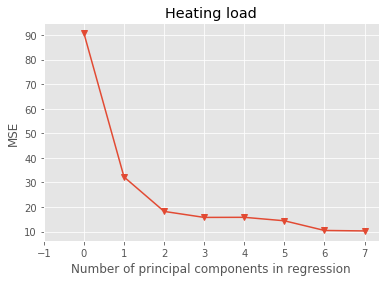

In [40]:
# выполним 10-кратную перекрустную кросс-валидацию
n = len(X_reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Рассчитаем MSE только с intercept (без главных компонентов)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Рассчитаем MSE используя кросс-валидацию для 8 главных компонентов, добавляя по 1 за раз.
for i in np.arange(1, 8):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Heating load')
plt.xlim(xmin=-1);

In [41]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 46.29,  61.79,  76.95,  89.45,  99.29,  99.95, 100.01, 100.01])

 Из графика видно что модели, использующей небольшое количество коэфф-тов, может быть достаточно. Видно, что используя M=6 мы можем описать примерно 99.94% модели. Используем PCA на тестовой выборке  и оценим модель

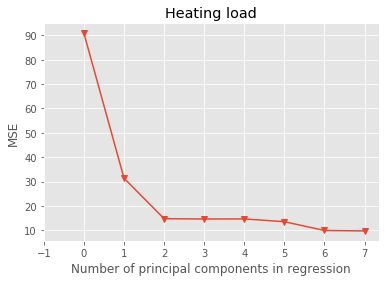

In [42]:
pca2 = PCA()

# Разделим выборку на тестовую и тренировочную
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 8):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Heating load')
plt.xlim(xmin=-1);

In [43]:
#Рассчитаем MSE
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# тренируем модель на тренировочных данных
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# предсказываем на тестовых
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

12.510236478759987

## 	Частные наименьшие квадраты

C:\Users\yurid\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:313: UserWarning: X scores are null at iteration 7
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\yurid\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:313: UserWarning: X scores are null at iteration 7
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\yurid\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:313: UserWarning: X scores are null at iteration 7
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\yurid\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:313: UserWarning: X scores are null at iteration 7
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\yurid\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:313: UserWarning: X scores are null at iteration 7
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\yurid\Anaconda3\lib\site-packages\sklearn\cross_decompos

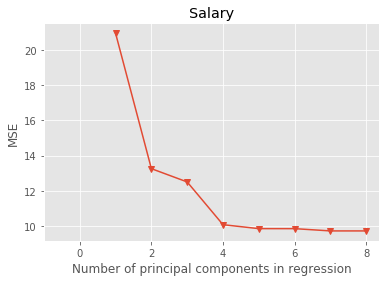

In [44]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 9):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 9), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)
plt.rcParams['figure.figsize'] = (5,4)

In [45]:
pls = PLSRegression(n_components=8)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

C:\Users\yurid\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:313: UserWarning: X scores are null at iteration 7
  warnings.warn('X scores are null at iteration %s' % k)


12.510236478759987

## Полиномиальная регрессия

In [48]:
#Построим полиномиальную регрессию
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

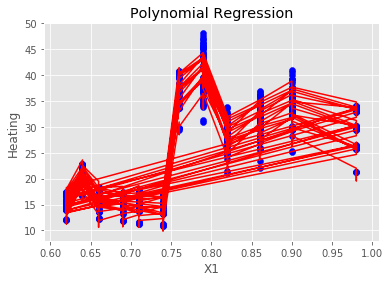

In [49]:
plt.scatter(ENB.X1, y, color = 'blue') 
  
plt.plot(ENB.X1, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('X1') 
plt.ylabel('Heating') 
  
plt.show()

## Одномерная регрессия

In [50]:
#загрузим  исходные данные
# источник https://www.kaggle.com/rsadiq/salary
Dataset = pd.read_csv('Salary.csv')
Dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


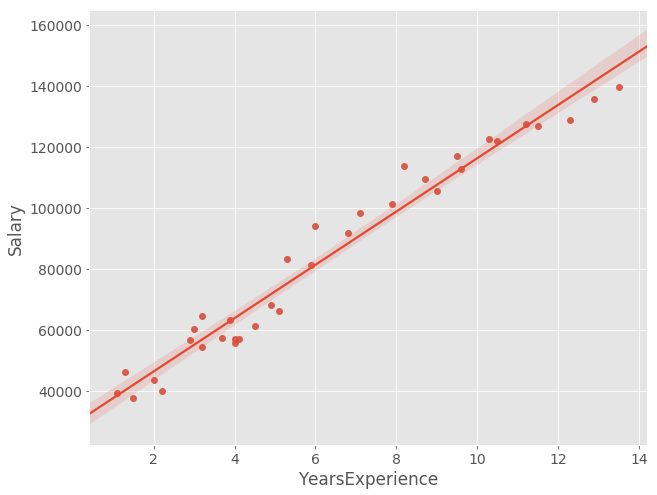

In [51]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
Dataset.plot(kind='scatter', x='YearsExperience', y='Salary', alpha=0.5)
sns.regplot(x="YearsExperience", y="Salary", data=Dataset);

In [52]:
#Выведем общие результаты модели, построенной в пакете statsmodels
result = smf.ols(formula="Salary ~ YearsExperience", data=Dataset).fit()
print (result.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     914.3
Date:                Fri, 11 Jan 2019   Prob (F-statistic):           1.23e-25
Time:                        01:34:04   Log-Likelihood:                -353.66
No. Observations:                  35   AIC:                             711.3
Df Residuals:                      33   BIC:                             714.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|       [0.05       0.95]
-----------------------------------------------------------------------------------
Intercept        2.886e+04   2092.797     

In [53]:
#Оценим по МНК коэффициенты уравнения регрессии:
print ('Коэффициенты уравнения регрессии: \n',result.params)

Коэффициенты уравнения регрессии: 
 Intercept          28859.526195
YearsExperience     8731.941047
dtype: float64


In [54]:
#Выведем интервальные оценки коэффициентов при уровне значимости α = 0.1
print('интервальные оценки коэффициентов при уровне значимости α = 0.1 = \n',result.conf_int(alpha=0.1))
# Рассчитаем t-статистики для коэффициентов модели
print('\n t-статистики для коэффициентов модели = \n',result.tvalues)
#Значения t-статистик >3. Следовательно коэфф. статистически значимые

интервальные оценки коэффициентов при уровне значимости α = 0.1 = 
                             0             1
Intercept        25317.759406  32401.292983
YearsExperience   8243.215895   9220.666199

 t-статистики для коэффициентов модели = 
 Intercept          13.789930
YearsExperience    30.237016
dtype: float64


In [55]:
#Оценим по МНК коэффициенты уравнения регрессии:
#Найдем коэфф. детерминации R^2
print ('коэфф. детерминации R^2= ', result.rsquared )
print ('скорректированный коэфф. детерминации R^2= ', result.rsquared_adj)

коэфф. детерминации R^2=  0.9651633106751443
скорректированный коэфф. детерминации R^2=  0.964107653422876


In [56]:
#Проверка R2 на статистическую значимость
print ('Коэффициент Фишера F= ', result.fvalue)
print (' \n табличный коэффициент Фишера при альфа=0.05 F крит= 3.8056, \n Следовательно, F>Fкрит, \n А значит, гипотеза о незначимости отклоняется, т.е. R^2 статистически значим')

Коэффициент Фишера F=  914.2771563414541
 
 табличный коэффициент Фишера при альфа=0.05 F крит= 3.8056, 
 Следовательно, F>Fкрит, 
 А значит, гипотеза о незначимости отклоняется, т.е. R^2 статистически значим


In [57]:
# для проверки гипотезы  об отсутствии автокорреляции остатков вычислим статистику Дарбина-Уотсона
#result.bse
statsmodels.stats.stattools.durbin_watson(result.resid , axis=0)

1.2837501671979967

In [58]:
#Построим полиномиальную регрессию
XX = Dataset.iloc[:, :-1]
YY = Dataset.iloc[:, -1].values

poly = PolynomialFeatures(degree = 3) 
X_pol = poly.fit_transform(XX) 
poly.fit(X_pol, YY) 
lin3 = LinearRegression() 
lin3.fit(X_pol, YY) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

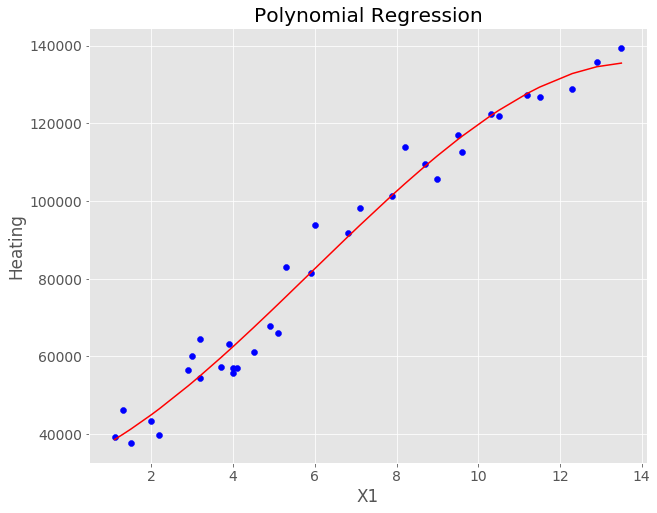

In [59]:
plt.scatter(Dataset.YearsExperience  , YY, color = 'blue') 
  
plt.plot(Dataset.YearsExperience, lin3.predict(poly.fit_transform(XX)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('X1') 
plt.ylabel('Heating') 
  
plt.show()

## Сплайны

In [74]:
#Создадим последовательность значений стажа работы
Years_grid = np.arange(Dataset.YearsExperience.min(), Dataset.YearsExperience.max()).reshape(-1,1)

Чтобы подогнать сплайны регрессии в python, мы используем модуль dmatrix из библиотеки patsy. Сплайны регрессии можно подогнать, построив соответствующую матрицу базисных функций. Функция bs () генерирует всю матрицу базисных функций для сплайнов с указанным набором узлов. Подгоним заработную плату к опыту работы.

In [96]:
from patsy import dmatrix
# зададим заранее узлы на уровнях 3, 8, 10 лет
transformed_x1 = dmatrix("bs(Dataset.YearsExperience, knots=(3,8,10), degree=3, include_intercept=False)",
                        {"Dataset.YearsExperience": Dataset.YearsExperience}, return_type='dataframe')

# Построим линейную модель по сплайнам
fit1 = sm.GLM(Dataset.Salary, transformed_x1).fit()
fit1.params

Intercept                                                                              39619.017200
bs(Dataset.YearsExperience, knots=(3, 8, 10), degree=3, include_intercept=False)[0]     5318.652832
bs(Dataset.YearsExperience, knots=(3, 8, 10), degree=3, include_intercept=False)[1]    14734.982870
bs(Dataset.YearsExperience, knots=(3, 8, 10), degree=3, include_intercept=False)[2]    62594.763079
bs(Dataset.YearsExperience, knots=(3, 8, 10), degree=3, include_intercept=False)[3]    80605.849409
bs(Dataset.YearsExperience, knots=(3, 8, 10), degree=3, include_intercept=False)[4]    92591.442530
bs(Dataset.YearsExperience, knots=(3, 8, 10), degree=3, include_intercept=False)[5]    99255.214177
dtype: float64

In [76]:
#Построим сплайн, используя функцию df с 6 степенями свободы 
transformed_x2 = dmatrix("bs(Dataset.YearsExperience, df=6, include_intercept=False)",
                        {"Dataset.YearsExperience": Dataset.YearsExperience}, return_type='dataframe')
fit2 = sm.GLM(Dataset.Salary, transformed_x2).fit()
fit2.params

Intercept                                                         38777.615887
bs(Dataset.YearsExperience, df=6, include_intercept=False)[0]      8892.895243
bs(Dataset.YearsExperience, df=6, include_intercept=False)[1]     11986.026059
bs(Dataset.YearsExperience, df=6, include_intercept=False)[2]     46697.716732
bs(Dataset.YearsExperience, df=6, include_intercept=False)[3]     81434.450911
bs(Dataset.YearsExperience, df=6, include_intercept=False)[4]     88609.786664
bs(Dataset.YearsExperience, df=6, include_intercept=False)[5]    100724.078563
dtype: float64

В этом случае python выбирает узлы, которые соответствуют 25, 50 и 75 процентилям опыта работы. Функция bs () также имеет аргумент степени, поэтому мы можем подгонять сплайны любой степени, а не только степень по умолчанию 3 (что дает кубический сплайн).
Чтобы вместо этого подогнать естественный сплайн, мы используем функцию cr (). Здесь нам подходит естественный сплайн с четырьмя степенями свободы: 

In [77]:
# Зададим 4 степени свободы
transformed_x3 = dmatrix("cr(Dataset.YearsExperience, df=4)", {"Dataset.YearsExperience": Dataset.YearsExperience}, return_type='dataframe')
fit3 = sm.GLM(Dataset.Salary, transformed_x3).fit()
fit3.params

Intercept                               69114.008932
cr(Dataset.YearsExperience, df=4)[0]   -30024.080129
cr(Dataset.YearsExperience, df=4)[1]    -6691.426532
cr(Dataset.YearsExperience, df=4)[2]    38245.704870
cr(Dataset.YearsExperience, df=4)[3]    67583.810724
dtype: float64

Text(0,0.5,'salary')

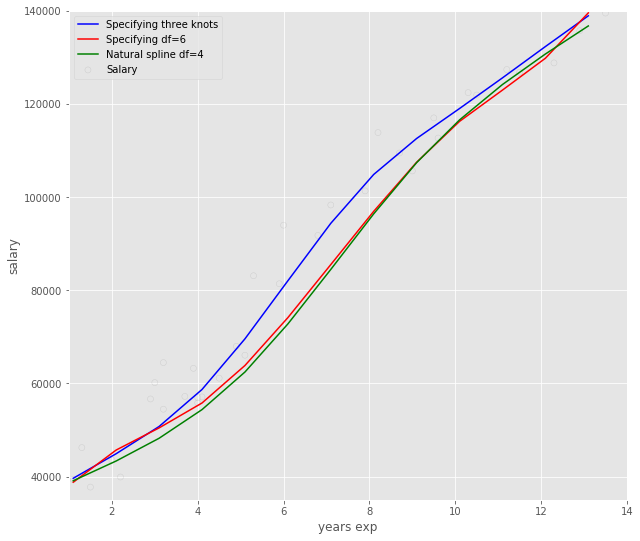

In [97]:
# Сделаем прогнозы на моделях
pred1 = fit1.predict(dmatrix("bs(Years_grid, knots=(4,8,10), include_intercept=False)",
                             {"Years_grid": Years_grid}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(Years_grid, df=6, include_intercept=False)",
                             {"Years_grid": Years_grid}, return_type='dataframe'))
pred3 = fit3.predict(dmatrix("cr(Years_grid, df=4)", {"Years_grid": Years_grid}, return_type='dataframe'))

#Построим сплайны
plt.scatter(Dataset.YearsExperience, Dataset.Salary, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(Years_grid, pred1, color='b', label='Specifying three knots')
plt.plot(Years_grid, pred2, color='r', label='Specifying df=6')
plt.plot(Years_grid, pred3, color='g', label='Natural spline df=4')
plt.legend()
plt.xlim(1,14)
plt.ylim(35000,140000)
plt.xlabel('years exp')
plt.ylabel('salary')